In [1]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
ACC=pd.read_csv('1571129566_A013E1\ACC.csv')
BVP=pd.read_csv('1571129566_A013E1\BVP.csv') ##Blood Volume Pulse
EDA=pd.read_csv('1571129566_A013E1\EDA.csv')
HR=pd.read_csv('1571129566_A013E1\HR.csv')
IBI=pd.read_csv('1571129566_A013E1\IBI.csv') #inter-beat-interval

In [3]:
HR.head()
#HR의 경우 첫데이터가 1인 이유는 10초간의 데이터를 평균내서 기록하므로 1로 표현된다

,1571129576.000000
0,1.00
1,64.00
2,72.00
3,65.33
4,68.25


In [16]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

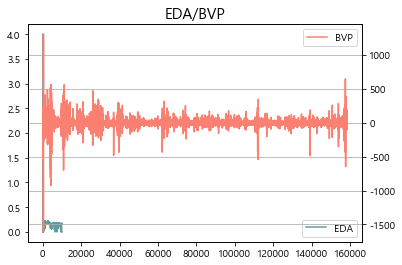

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.plot(EDA,color='cadetblue')
ax2.plot(BVP,color='salmon')
plt.title("EDA/BVP", fontsize = 15)
ax1.legend(['EDA'],loc='lower right')
ax2.legend(['BVP'],loc='upper right')
plt.grid()
plt.show()

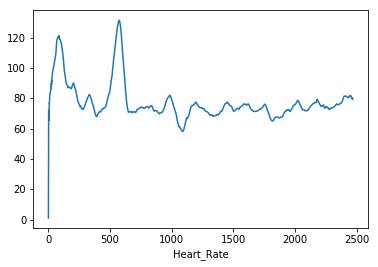

In [4]:
ax3=plt.plot(HR)
plt.xlabel('Heart_Rate')
plt.show()

In [10]:
print('ACC : ',len(ACC))
print('BVP : ',len(BVP))
print('EDA : ',len(EDA))
print('HR : ',len(HR))
print('IBI : ',len(IBI))

ACC :  79279
BVP :  158555
EDA :  9907
HR :  2469
IBI :  780


In [ ]:
ax3=plt.plot(BVP)
plt.xlabel('BVP')
plt.show()

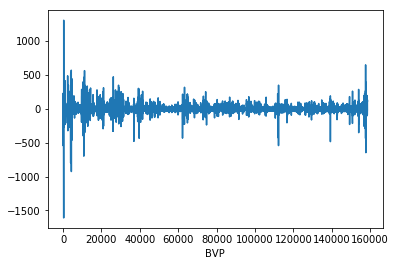

In [14]:
ax3=plt.plot(BVP)
plt.xlabel('BVP')
plt.show()

In [29]:
len(HR)

2469

In [34]:
df_Happy = []
df_comfor= []
a=int( len(HR)/3 )
b=len(HR)%3
for i in range(a):
    df_Happy.append(7)
    df_comfor.append(8)
for i in range(a):
    df_Happy.append(9)
    df_comfor.append(5)
for i in range(a):
    df_Happy.append(9)
    df_comfor.append(5)

In [43]:
from keras.models import Sequential # 케라스의 Sequential()을 임포트
from keras.layers import Dense # 케라스의 Dense()를 임포트
from keras import optimizers # 케라스의 옵티마이저를 임포트

In [37]:
df_Happy = pd.DataFrame(df_Happy)
df_comfor = pd.DataFrame(df_comfor)

In [39]:
X=HR

In [38]:
y=df_Happy

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

C:\Users\PCI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1975, 1), (494, 1), (1975, 2), (494, 2))

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
sgd=optimizers.SGD(lr=0.01)
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
W1020 17:00:09.544108 16944 deprecation_wrapper.py:119] From C:\Users\PCI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



NameError: name 'optimizers' is not defined

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)